# 1.0 Predictive Analysis for Humanitarian Aid 

### 1.1 Problem definition

Predictive analytics to help organisations such as the United Nations(UN) to allocate resources more promptly and effectively to Humanitarian Crisis areas as well as provide an objective base for vulnerability assessment and priority setting.

This is achieved by analysing historical data on natural disasters, conflict zones, and other relevant factors.

This notebook also provides Key insights to the Natural Disasters database which contains over 22,000 mass disasters as of 1900 to 2021

### 1.2 Data and acknowledgements 
Sourced from https://www.kaggle.com/datasets/jnegrini/emdat19002021


### 1.3 Acknowledgements
TThe credit for creating and maintaining the Database is for the Centre for Research on the Epidemiology of Disasters - CRED and the School of Public Health from the Université catholique de Louvain.

“EM-DAT, CRED / UCLouvain, Brussels, Belgium – www.emdat.be (D. Guha-Sapir)”


### 1.4 Content 
For an event to be registered into the EM-DAT database it must fulfill one of three entry criteria:

Deaths: 10 or more people deaths

Affected: 100 or more people affected/injured/homeless.

Declaration/international appeal: Declaration by the country of a state of emergency and/or an appeal for international assistance


### 1.5 Key Insights 
.

..

...

....



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib.colors import ListedColormap
import random
from matplotlib.ticker import ScalarFormatter
#import cartopy.crs as ccrs

# Exploritory Data Analysis with Visualisations.

Importing 1900_2021_DISASTERS.xlsx - emdat data.csv found in the directory of the humanitarian aid folder.

In [2]:
#reading csv file

emdata_org = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
emdata_org.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


## Infomation on dataset 

The summaries below show information regarding the dataset

1. Data columns - 45 

2. Entries - 16125

3. Data types - float64(14), int64(4), object(27)

In [3]:
emdata_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [4]:
emdata_org.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,1900,1900,1902,1902,1902,1903,1903,1904,1905,1905
Seq,9002,9001,12,3,10,6,12,3,5,3
Glide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disaster Group,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural
Disaster Subgroup,Climatological,Climatological,Geophysical,Geophysical,Geophysical,Geophysical,Geophysical,Meteorological,Geophysical,Geophysical
Disaster Type,Drought,Drought,Earthquake,Volcanic activity,Volcanic activity,Mass movement (dry),Volcanic activity,Storm,Mass movement (dry),Earthquake
Disaster Subtype,Drought,Drought,Ground movement,Ash fall,Ash fall,Rockfall,Ash fall,Tropical cyclone,Rockfall,Ground movement
Disaster Subsubtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event Name,NaN,NaN,NaN,Santa Maria,Santa Maria,NaN,Mount Karthala,NaN,NaN,NaN
Country,Cabo Verde,India,Guatemala,Guatemala,Guatemala,Canada,Comoros (the),Bangladesh,Canada,India


## Death impact for each disaster group over time.


##### Climatological
1900 - 1980s , we see Climatological events having death impacts af a minimum of less than 5000 deaths 
Over time this subgroup has less or close to zero(O) Deaths recorderd.


##### Biological
1900 - 1920s, this subgroup has had death impacts in the early 1900s.
Over time from 1900 -1920s the death impact was reducing.
From 1900 -2021,  the deaths reduced to zero.


##### Extra-terrestrial
Non recorded 

##### Geophysical	
Has the most number of recorded deaths.
From 1900 -2021 the subgroup has continued having death impacts.

##### Hydrological	
Impact of deaths was between 1920s and 1960s
Over time there has been less impact.

##### Meteorological
From 1900 -2021 the subgroup has continued having death impacts.

In [5]:
pd.crosstab(emdata_org.Year,emdata_org['Disaster Subgroup'])

Disaster Subgroup,Biological,Climatological,Extra-terrestrial,Geophysical,Hydrological,Meteorological
Year,,,,,,
1900,1,2,0,2,1,1
1901,1,0,0,1,0,0
1902,0,0,0,9,0,1
1903,0,1,0,7,2,2
1904,0,0,0,3,0,1
...,...,...,...,...,...,...
2017,27,27,0,25,152,140
2018,16,27,0,30,141,124
2019,44,29,0,36,221,112


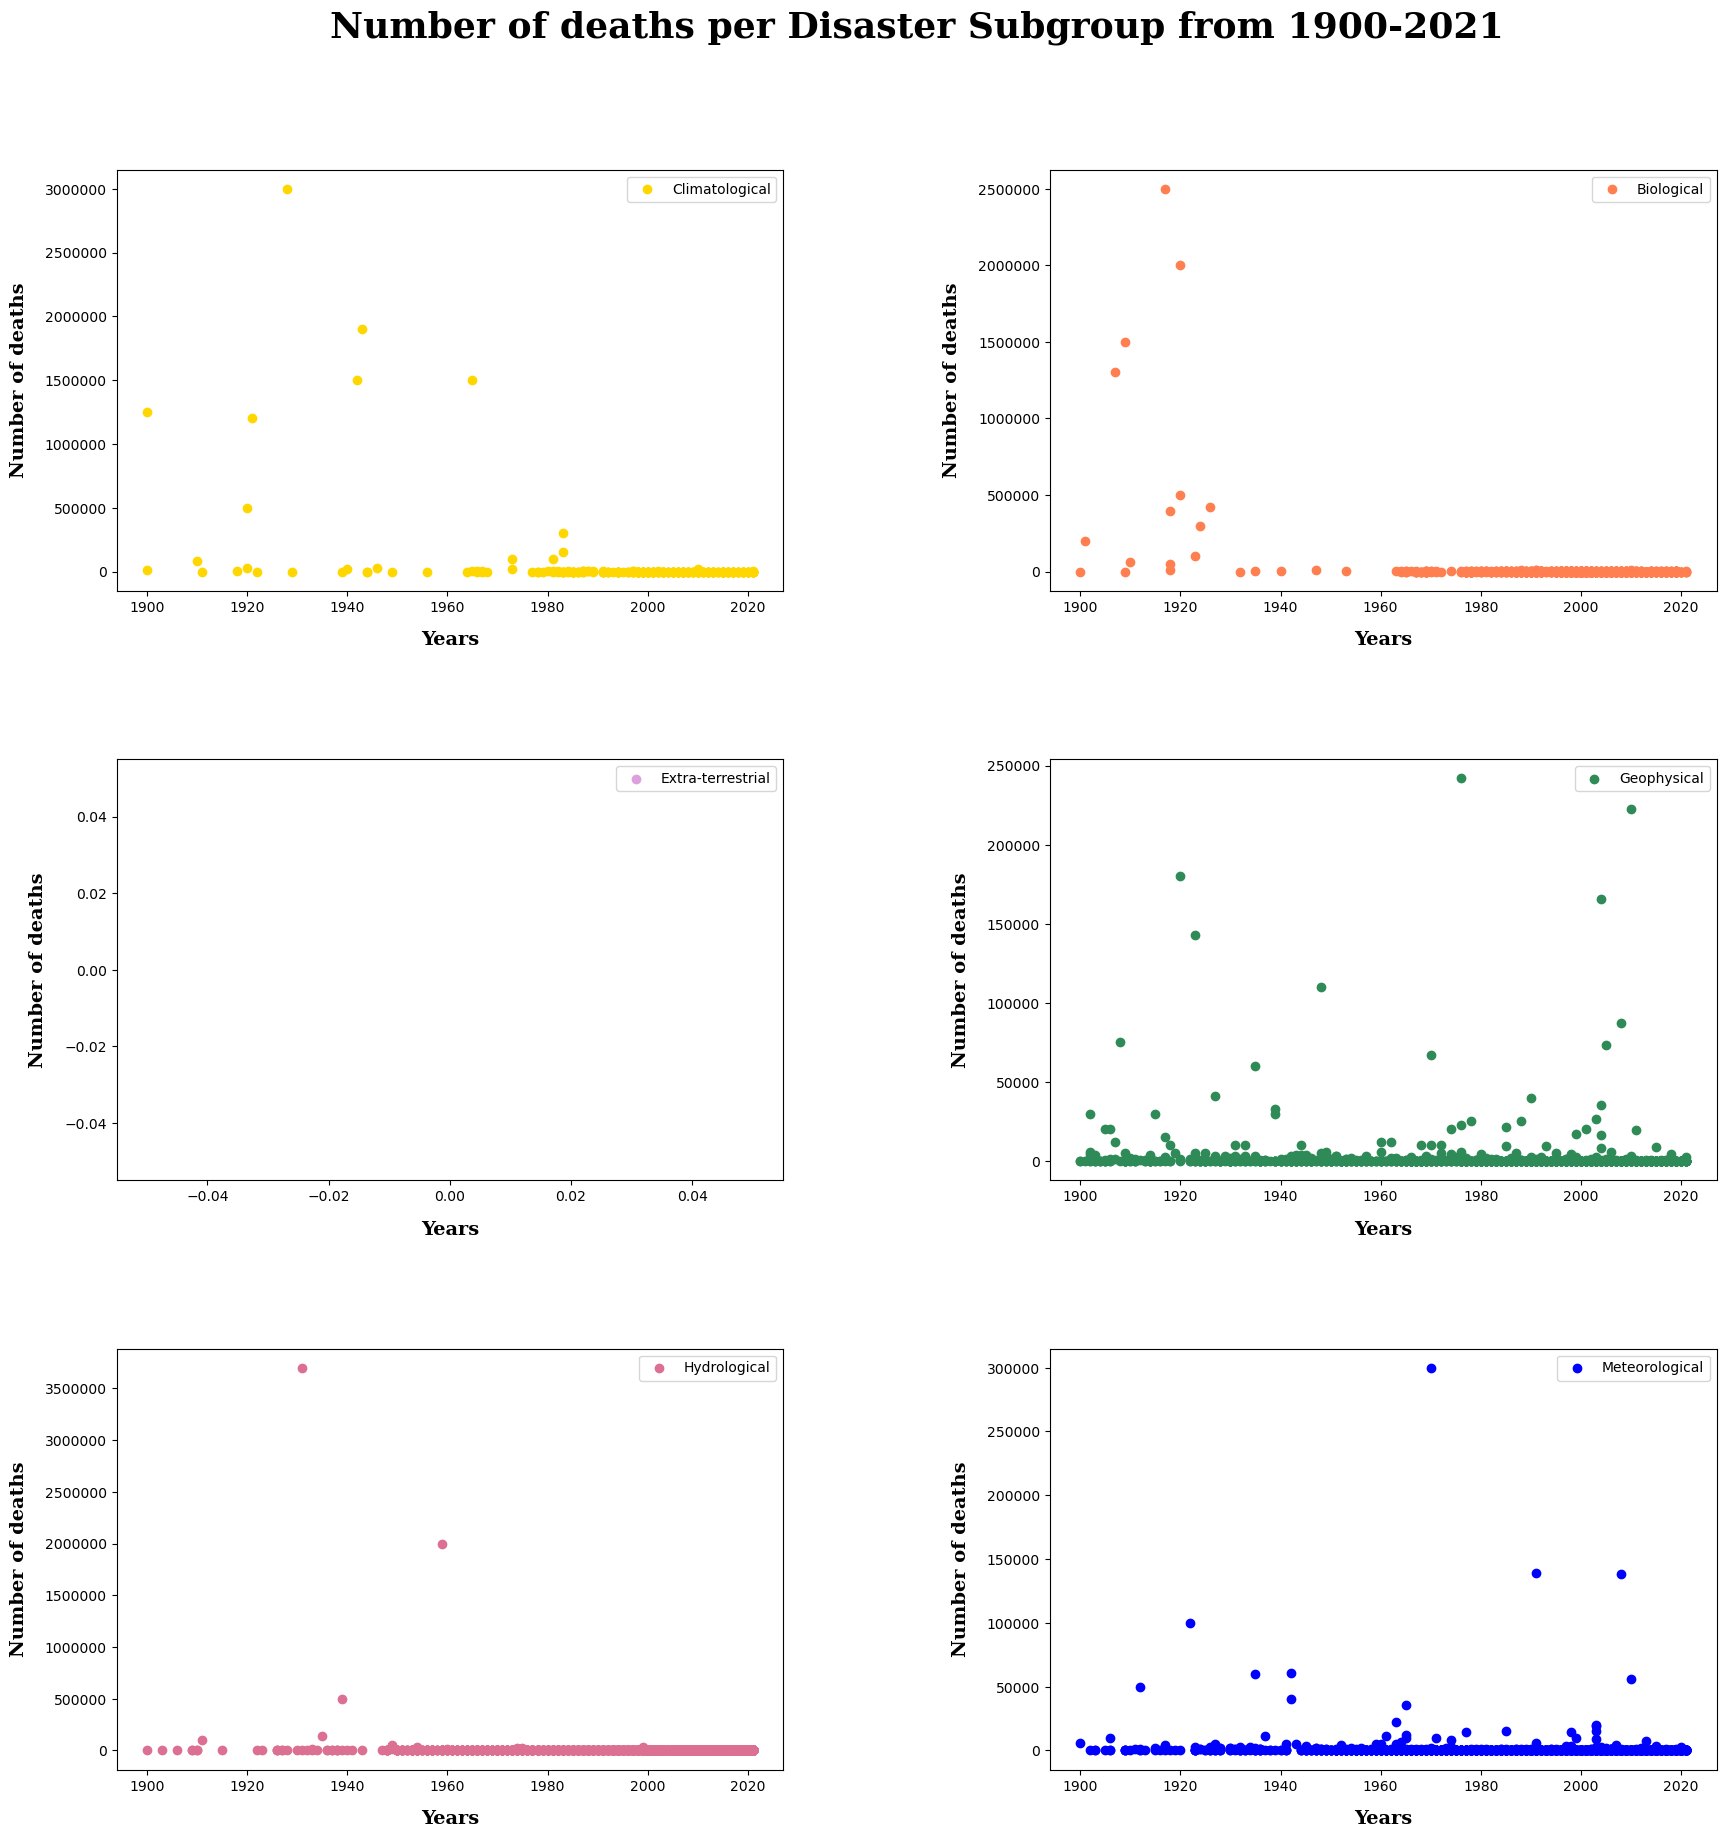

In [6]:
 import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

disaster_subs = {
    'Climatological':'Climatological',
    'Biological':'Biological',
    'Extra-terrestrial':'Extra-terrestrial',
    'Geophysical':'Geophysical',
    'Hydrological':'Hydrological',
    'Meteorological':'Meteorological'
}

colors = ['yellowgreen','coral','cadetblue','plum','deeppink','seagreen','darkorange','gold','palevioletred','pink','purple','blue','skyblue','lightskyblue','olivedrab']
cmap = ListedColormap(colors)

def find_index(list_colors):
     random_color = random.choice(list_colors)
     index=list_colors.index(random_color)
     return index

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

for i, (name, sub_group) in enumerate(disaster_subs.items()):
    index = find_index(colors)
    
    ax[i//2, i%2].ticklabel_format(axis='both', style='plain')
    
    ax[i//2, i%2].scatter(
        emdata_org.Year[emdata_org['Disaster Subgroup'] == sub_group], 
        emdata_org['Total Deaths'][emdata_org['Disaster Subgroup'] == sub_group],
        c=colors[index]
    )
   

    font = {'family': 'serif',
            'color': 'black',
            'weight': 'bold',
            'size': 14}
    font2 = {
    'family': 'serif',
    'color': 'black',
        }
   
    fig.suptitle('Number of deaths per Disaster Subgroup from 1900-2021', fontdict=font2, fontweight='bold',size=26)

    ax[i//2, i%2].set_xlabel('Years', fontdict=font, labelpad=12)
    ax[i//2, i%2].set_ylabel('Number of deaths', fontdict=font, labelpad=12)
    ax[i//2, i%2].legend([name])

plt.show()


## 1.0 Data Cleaning 

### 1.1 Cleaning Null values 

In [7]:
emdata_org.head().T

,0,1,2,3,4
Year,1900,1900,1902,1902,1902
Seq,9002,9001,12,3,10
Glide,NaN,NaN,NaN,NaN,NaN
Disaster Group,Natural,Natural,Natural,Natural,Natural
Disaster Subgroup,Climatological,Climatological,Geophysical,Geophysical,Geophysical
Disaster Type,Drought,Drought,Earthquake,Volcanic activity,Volcanic activity
Disaster Subtype,Drought,Drought,Ground movement,Ash fall,Ash fall
Disaster Subsubtype,NaN,NaN,NaN,NaN,NaN
Event Name,NaN,NaN,NaN,Santa Maria,Santa Maria
Country,Cabo Verde,India,Guatemala,Guatemala,Guatemala


In [8]:
emdata_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [9]:
#Sum of each missing value. 
emdata_org.isna().sum()

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [10]:
# rename the dataframe.
df = emdata_org

In [11]:
# Check if label is null and numeric, the fill missing values.

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label]=content.fillna(content.median())



# Which disaster sub-group has a greater death impact.

Climatological had the greatest death impact, followed by Biological.

Extra-terrestrial had the least death impact.

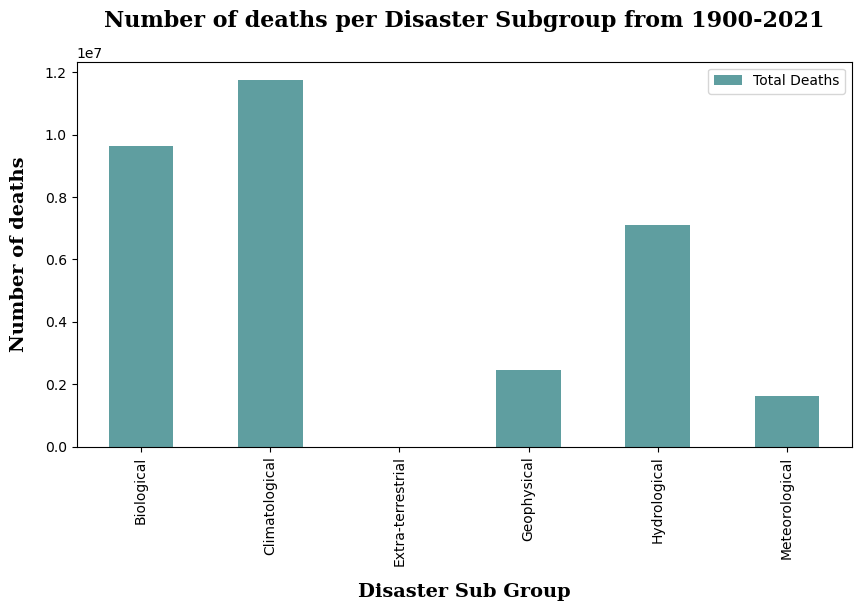

In [12]:
'''
1. Create a dataframe with total deaths / subgroup
'''

df_total = pd.DataFrame({'Disaster Subgroup': df['Disaster Subgroup'], 
                        'Total Deaths': df['Total Deaths']
                       })
result = df_total.groupby('Disaster Subgroup')['Total Deaths'].sum()
deaths_grouped = pd.DataFrame(df.groupby('Disaster Subgroup')['Total Deaths'].sum())
deaths_grouped.plot(kind='bar',color='cadetblue',figsize=(10,5))

font = {'family': 'serif',
        'color': 'black',
        'weight': 'bold',
        'size': 14}

   
plt.title('Number of deaths per Disaster Subgroup from 1900-2021', fontdict=font2, fontweight='bold',size=16,pad=25)
plt.xlabel('Disaster Sub Group',fontdict=font, labelpad=12)
plt.ylabel('Number of deaths', fontdict=font, labelpad=12)

plt.show()



In [13]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,1900,1900,1902,1902,1902,1903,1903,1904,1905,1905,1906,1906,1906,1906,1906,1907,1907,1908,1909,1909
Seq,9002,9001,12,3,10,6,12,3,5,3,14,2,23,24,15,6,1,11,10,13
Glide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disaster Group,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural
Disaster Subgroup,Climatological,Climatological,Geophysical,Geophysical,Geophysical,Geophysical,Geophysical,Meteorological,Geophysical,Geophysical,Geophysical,Geophysical,Hydrological,Hydrological,Meteorological,Geophysical,Biological,Geophysical,Meteorological,Meteorological
Disaster Type,Drought,Drought,Earthquake,Volcanic activity,Volcanic activity,Mass movement (dry),Volcanic activity,Storm,Mass movement (dry),Earthquake,Earthquake,Earthquake,Flood,Flood,Storm,Earthquake,Epidemic,Mass movement (dry),Storm,Storm
Disaster Subtype,Drought,Drought,Ground movement,Ash fall,Ash fall,Rockfall,Ash fall,Tropical cyclone,Rockfall,Ground movement,Ground movement,Ground movement,NaN,NaN,Tropical cyclone,Ground movement,Bacterial disease,Landslide,Tropical cyclone,Tropical cyclone
Disaster Subsubtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event Name,NaN,NaN,NaN,Santa Maria,Santa Maria,NaN,Mount Karthala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bubonic,NaN,NaN,NaN
Country,Cabo Verde,India,Guatemala,Guatemala,Guatemala,Canada,Comoros (the),Bangladesh,Canada,India,Chile,Colombia,Belgium,Belgium,Hong Kong,China,India,Canada,Bangladesh,Bangladesh


# Continent and location 

In [ ]:
import geocoder

locations = df['Location']
coordinates = []

print('Execution started')
for location in locations:
    try:
        g = geocoder.osm(location, timeout=5)
        if g.latlng is not None:
            coordinates.append(g.latlng)
        else:
            print(f"Skipping location: {location}")
    except geocoder.exc.GeocoderServiceError as e:
        print(f"Geocoding service error: {e}. Retrying in 1 second...")
        time.sleep(1)

print(coordinates)
print('Execution Ended')

Execution started
Skipping location: Quezaltenango, San Marcos
Skipping location: Spence's Bridge, British Columbia
Skipping location: Lambesc, Saint-Cannat, Rognes, Vernegues, Charleval, La Roque d'Antheron (Haute-Provence)
Skipping location: Cul de Sac,Leogane
Skipping location: Kabylie, Masqueray
Skipping location: Cochrane (and Northern Region), Ontario
Skipping location: Wenchou
Skipping location: Cooper Mine, British Columbia
Skipping location: South, Southwest area
Skipping location: Natiuonwide
Skipping location: Small Island between Java and Sumatra
Skipping location: Gansu, Shanxi provinces
Skipping location: Talifu (Yunnan province)
Skipping location: Bezwada, Masulipatam
Skipping location: Havana and suburbs
Skipping location: Yeng-Kong
Skipping location: Shensi, Honan, Kansu
Skipping location: Termonde, Anvers, Charleroi, Bruxelles
Skipping location: Meuse Valley
Skipping location: Lyon (Rhone) - Colline des Balmes, quartier Saint-Jean
Skipping location: Prairie provinces,

In [ ]:
'''
# Convert the geo longitude and latitude list into a csv.
import csv

my_list = coordinates

# Specify the file path and name for the CSV file
csv_file = 'coordinates.csv'

# Open the CSV file in write mode
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the entire list as a single row in the CSV file
    writer.writerow(my_list)
    writer

In [ ]:
'''
import folium
# create map centered on the United States
display_map = folium.Map(location=[0, 0], zoom_start=4)

# add bubbles to the map
for i, location in enumerate(locations):
    folium.CircleMarker(location=coordinates[i], radius=10, popup=location).add_to(display_map)

# display the map
display_map
'''

# Which disaster had a larger impact on continents?

In [ ]:
pd.crosstab(df['Disaster Type'],df['Continent']).plot(kind='bar',figsize=(10,5),width=0.6, color =['yellowgreen','coral','cadetblue','plum','deeppink']);
plt.title('Count of Disaster Types Occurances Per Continent', fontdict=font2, fontweight='bold',size=16,pad=25)
plt.xlabel('Disaster Type',fontdict=font, labelpad=12)
plt.ylabel('Count', fontdict=font, labelpad=12)
plt.show()